# Importing the Libraries and Packages



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Loading the data

In [8]:
dfDeliveries = pd.read_csv('IPL_Ball_by_Ball_2022.csv') 
dfMatches = pd.read_csv('IPL_Matches_2022.csv')

In [9]:
pd.set_option('max_columns',100)

In [10]:
dfDeliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [11]:
dfMatches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


# Data PreProcessing

In [12]:
dfDeliveries = dfDeliveries.merge(dfMatches, on='ID')

In [13]:
dfDeliveries['BowlingTeam'] = np.where(dfDeliveries['BattingTeam']==dfDeliveries['Team1'],
                                       dfDeliveries['Team2'],
                                       dfDeliveries['Team1'])

In [14]:
dfDeliveries.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,BowlingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,Gujarat Titans


# PlayerWise Aggregation – Batting Metrics

# Innings, Runs and Dismissals

In [15]:
dfBatsmen = dfDeliveries.groupby('batter')\
            .agg({'ID':'nunique','batsman_run':'sum','isWicketDelivery':'sum'})\
            .reset_index()

In [16]:
dfBatsmen.head()

,batter,ID,batsman_run,isWicketDelivery
0,A Badoni,11,161,9
1,A Manohar,7,108,6
2,A Nortje,1,1,0
3,A Tomar,1,4,1
4,AD Russell,12,335,9


In [17]:
dfBatsmen.columns = ['Batter','Innings','Runs','Dismissals']

In [18]:
dfBatsmen.head()

,Batter,Innings,Runs,Dismissals
0,A Badoni,11,161,9
1,A Manohar,7,108,6
2,A Nortje,1,1,0
3,A Tomar,1,4,1
4,AD Russell,12,335,9


# Balls Faced

In [19]:
dfBallsFaced = dfDeliveries[(dfDeliveries['extra_type']!='wides')].groupby('batter')['ID'].count().reset_index()
dfBallsFaced.columns = ['Batter','Balls Faced']

In [20]:
dfBallsFaced.head()

,Batter,Balls Faced
0,A Badoni,130
1,A Manohar,75
2,A Nortje,6
3,A Tomar,8
4,AD Russell,192


# Boundaries – 4s and 6s

In [21]:
dfBatter4s = dfDeliveries[(dfDeliveries['batsman_run']==4)&(dfDeliveries['non_boundary']==0)]\
            .groupby('batter')['ID']\
            .count()\
            .reset_index()\
            .sort_values('ID')
dfBatter4s.columns = ['Batter','4s']

In [22]:
dfBatter4s.head()

,Batter,4s
50,KK Nair,1
25,DJ Mitchell,1
60,M Ashwin,1
28,DR Sams,1
62,M Vohra,1


In [23]:
dfBatter6s = dfDeliveries[(dfDeliveries['batsman_run']==6)&(dfDeliveries['non_boundary']==0)]\
            .groupby('batter')['ID']\
            .count()\
            .reset_index()\
            .sort_values('ID')
dfBatter6s.columns = ['Batter','6s']

In [24]:
dfBatter6s.head()

,Batter,6s
55,Mohsin Khan,1
90,SE Rutherford,1
17,DJ Bravo,1
82,RV Patel,1
94,SP Jackson,1


In [25]:
dfMatchWise = dfDeliveries.groupby(['batter','ID'])['batsman_run'].sum().reset_index()

In [26]:
dfMatchWise.head()

,batter,ID,batsman_run
0,A Badoni,1304050,54
1,A Badoni,1304053,19
2,A Badoni,1304058,19
3,A Badoni,1304061,10
4,A Badoni,1304066,5


# High Score

In [27]:
dfHighScore = dfMatchWise.groupby(['batter'])['batsman_run'].max().reset_index()
dfHighScore.columns = ['Batter','High Score']

In [28]:
dfHighScore.head()

,Batter,High Score
0,A Badoni,54
1,A Manohar,43
2,A Nortje,1
3,A Tomar,4
4,AD Russell,70


# 50s and 100s

In [29]:
df50s = dfMatchWise[(dfMatchWise['batsman_run']>=50)&(dfMatchWise['batsman_run']<100)]\
        .groupby('batter')['batsman_run']\
        .count()\
        .reset_index()\
        .sort_values('batsman_run',ascending=False)
df50s.columns = ['Batter','50']

In [30]:
df50s.head()

,Batter,50
10,DA Warner,5
46,Shubman Gill,4
18,JC Buttler,4
16,HH Pandya,4
23,LS Livingstone,4


In [31]:
df100s = dfMatchWise[(dfMatchWise['batsman_run']>=100)]\
        .groupby('batter')['batsman_run']\
        .count()\
        .reset_index()\
        .sort_values('batsman_run',ascending=False)
df100s.columns = ['Batter','100']

In [32]:
df100s.head()

,Batter,100
0,JC Buttler,4
1,KL Rahul,2
2,Q de Kock,1
3,RM Patidar,1


# Merging all the DataFrames

In [33]:
dfBatsmen = dfBatsmen.merge(dfBallsFaced, on='Batter',how='outer').merge(dfBatter4s, on='Batter',how='outer')\
                     .merge(dfBatter6s, on='Batter',how='outer').merge(dfHighScore, on='Batter',how='outer')\
                     .merge(df50s, on='Batter',how='outer').merge(df100s, on='Batter',how='outer')


In [34]:
dfBatsmen.head()

,Batter,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100
0,A Badoni,11,161,9,130,11.0,7.0,54,1.0,NaN
1,A Manohar,7,108,6,75,14.0,3.0,43,NaN,NaN
2,A Nortje,1,1,0,6,NaN,NaN,1,NaN,NaN
3,A Tomar,1,4,1,8,1.0,NaN,4,NaN,NaN
4,AD Russell,12,335,9,192,18.0,32.0,70,1.0,NaN


In [35]:
dfBatsmen['Strike Rate'] = (dfBatsmen['Runs']/dfBatsmen['Balls Faced'])*100
dfBatsmen['Batting Average'] = dfBatsmen['Runs']/dfBatsmen['Dismissals']

In [36]:
dfBatsmen.fillna(0, inplace=True)

In [37]:
dfBatsmen.sort_values(by='Runs', ascending=False).head()

,Batter,Innings,Runs,Dismissals,Balls Faced,4s,6s,High Score,50,100,Strike Rate,Batting Average
49,JC Buttler,17,863,15,579,83.0,45.0,116,4.0,4.0,149.050086,57.533333
65,KL Rahul,14,616,11,455,45.0,30.0,103,4.0,2.0,135.384615,56.000000
112,Q de Kock,15,508,15,341,47.0,23.0,140,3.0,1.0,148.973607,33.866667
42,HH Pandya,15,487,10,371,49.0,12.0,87,4.0,0.0,131.266846,48.700000
154,Shubman Gill,16,483,15,365,51.0,11.0,96,4.0,0.0,132.328767,32.200000


# TeamWise Aggregation – Bowling Metrics in Death Overs

In [38]:
def overClassifier(val):
    if val>=0 and val<6:
        return 'Power Play'
    elif val>=6 and val<15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [39]:
dfDeliveries['PhaseOfPlay'] = dfDeliveries['overs'].map(overClassifier)

In [40]:
dfDeliveries[['overs','PhaseOfPlay']].sort_values('overs').drop_duplicates().reset_index(drop=True)

,overs,PhaseOfPlay
0,0,Power Play
1,1,Power Play
2,2,Power Play
3,3,Power Play
4,4,Power Play
5,5,Power Play
6,6,Middle Overs
7,7,Middle Overs
8,8,Middle Overs
9,9,Middle Overs


In [41]:
dfDeathOvers = dfDeliveries[dfDeliveries['PhaseOfPlay']=='Death Overs']

# Innings, Runs and Dismissals

In [42]:
dfDeathBowling = dfDeathOvers.groupby('BowlingTeam').agg({'total_run':'sum','isWicketDelivery':'sum'}).reset_index()

In [43]:
dfDeathBowling.columns = ['Team','Runs Conceded','Wickets']

# Balls Bowled

In [44]:
dfDOBallsBowled = dfDeliveries[~((dfDeliveries['extra_type']=='wides'))&(dfDeliveries['PhaseOfPlay']=='Death Overs')]\
                  .groupby('BowlingTeam')['ID']\
                  .count().reset_index()
dfDOBallsBowled.columns = ['Team','Balls Bowled']

In [45]:
dfDeathBowling = dfDeathBowling.merge(dfDOBallsBowled, on='Team')

# Overs, Bowling Average, Bowling Strike Rate and Economy Rate

In [46]:
dfDeathBowling['Overs'] = dfDeathBowling['Balls Bowled']/6
dfDeathBowling['Bowling Average'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Wickets']
dfDeathBowling['Bowling Strike Rate'] = dfDeathBowling['Balls Bowled']/dfDeathBowling['Wickets']
dfDeathBowling['Economy Rate'] = dfDeathBowling['Runs Conceded']/dfDeathBowling['Overs']

In [47]:
dfDeathBowling = dfDeathBowling.sort_values('Economy Rate',ascending=False).reset_index(drop=True)

In [48]:
dfDeathBowling

,Team,Runs Conceded,Wickets,Balls Bowled,Overs,Bowling Average,Bowling Strike Rate,Economy Rate
0,Lucknow Super Giants,776,35,418,69.666667,22.171429,11.942857,11.138756
1,Sunrisers Hyderabad,669,33,369,61.500000,20.272727,11.181818,10.878049
2,Mumbai Indians,639,33,354,59.000000,19.363636,10.727273,10.830508
3,Royal Challengers Bangalore,744,31,422,70.333333,24.000000,13.612903,10.578199
4,Rajasthan Royals,813,39,469,78.166667,20.846154,12.025641,10.400853
5,Chennai Super Kings,599,27,346,57.666667,22.185185,12.814815,10.387283
6,Delhi Capitals,711,35,414,69.000000,20.314286,11.828571,10.304348
7,Kolkata Knight Riders,640,30,376,62.666667,21.333333,12.533333,10.212766
8,Punjab Kings,561,29,342,57.000000,19.344828,11.793103,9.842105
9,Gujarat Titans,645,38,415,69.166667,16.973684,10.921053,9.325301


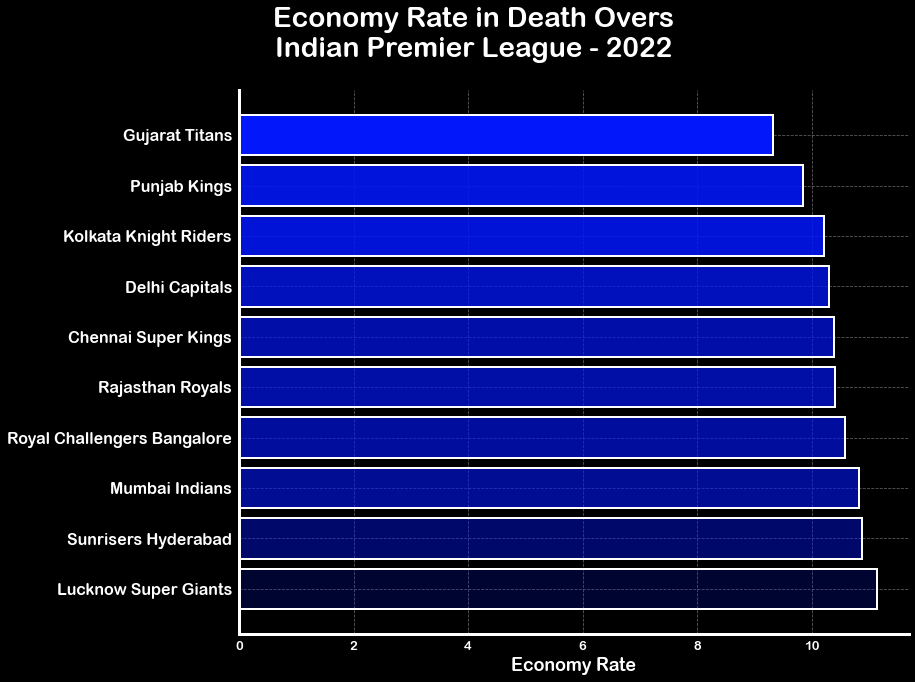

In [50]:
fig,ax = plt.subplots(figsize=(12,10))

fig.set_facecolor('black')
ax.patch.set_facecolor('black')

ax.set_axisbelow(True)
ax.grid(color='grey',which='major',linestyle='--',alpha=0.75)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


scaler = MinMaxScaler(feature_range=(0.2,1))

alphaList = scaler.fit_transform(dfDeathBowling['Economy Rate'].values.reshape(-1,1)).flatten().tolist()
alphaList.reverse()


for index,row in dfDeathBowling.iterrows():
    ax.barh(dfDeathBowling['Team'][index],dfDeathBowling['Economy Rate'][index],
            color='#0217fa',alpha=alphaList[index])
    
    ax.barh(dfDeathBowling['Team'][index],dfDeathBowling['Economy Rate'][index],
            color='None',edgecolor='white',lw=2)

    
plt.yticks(fontsize=16,color='white',fontname='Arial Rounded MT Bold')
plt.xticks(fontsize=13,color='white',fontname='Arial Rounded MT Bold')


plt.xlabel('Economy Rate',fontsize=18,color='white',fontname='Arial Rounded MT Bold')

plt.title(x=0.35,y=1.05,label='Economy Rate in Death Overs\nIndian Premier League - 2022',
          fontsize=28,color='white',fontname='Arial Rounded MT Bold')

plt.show()